## Step 1: Setup & Initial Data Loading

In [30]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up visualization style
plt.style.use('ggplot')
sns.set_palette("viridis")
%matplotlib inline

# Load the datasets
movies = pd.read_csv('../data/rotten_tomatoes_movies.csv')
reviews = pd.read_csv('../data/rotten_tomatoes_movie_reviews.csv')

print("Movies shape:", movies.shape)
print("Reviews shape:", reviews.shape)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Movies shape: (143258, 16)
Reviews shape: (1444963, 11)


## Step 2: Initial Data Inspection

In [11]:

# Basic info about the movies dataset
print("=== MOVIES DATASET INFO ===")
movies.info()

# Display first few rows
print("\n=== FIRST 5 ROWS ===")
display(movies.head())

# Check for duplicates
print("\n=== DUPLICATE CHECK ===")
print("Duplicate movies:", movies.duplicated(subset=['id']).sum())
print("Duplicate titles:", movies.duplicated(subset=['title']).sum())

# Summary statistics for numerical columns
print("\n=== NUMERICAL SUMMARY ===")
display(movies.describe())

=== MOVIES DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139041 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN



=== DUPLICATE CHECK ===
Duplicate movies: 1206
Duplicate titles: 16854

=== NUMERICAL SUMMARY ===


,audienceScore,tomatoMeter,runtimeMinutes
count,73248.000000,33877.000000,129431.000000
mean,55.674967,65.770346,93.708578
std,24.553648,28.023203,28.129175
min,0.000000,0.000000,1.000000
25%,37.000000,45.000000,84.000000
50%,57.000000,73.000000,92.000000
75%,76.000000,89.000000,103.000000
max,100.000000,100.000000,2700.000000


## Step 3: Univariate Analysis
### 3.1 Continuous Variables Analysis

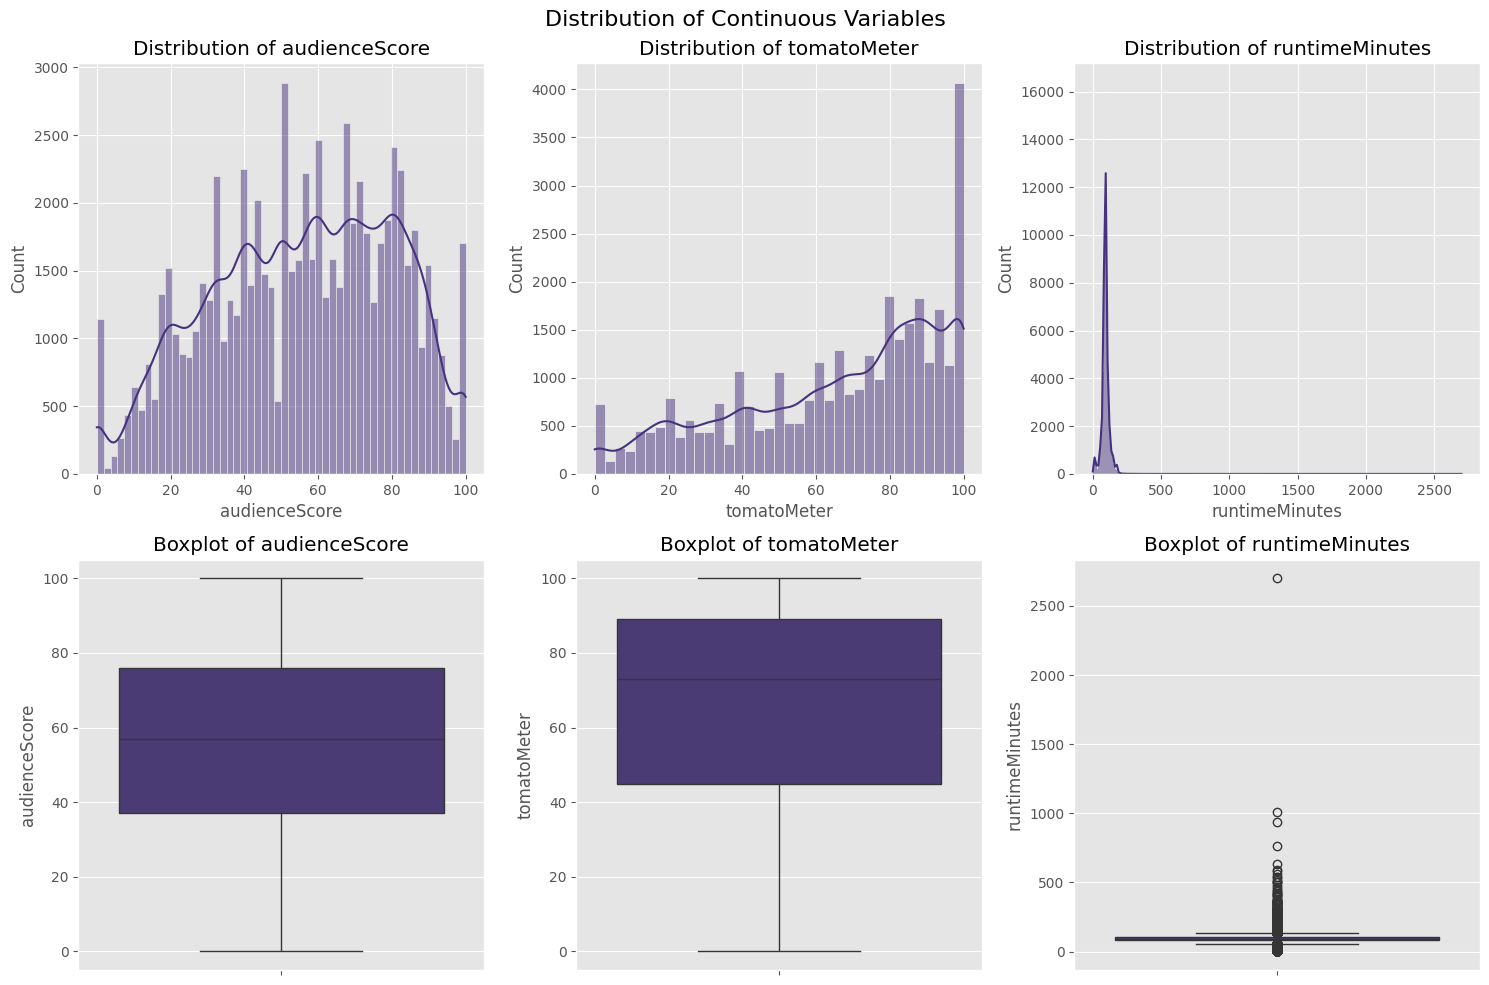

=== SKEWNESS & KURTOSIS ===
audienceScore: Skewness=-0.23, Kurtosis=-0.83
tomatoMeter: Skewness=-0.65, Kurtosis=-0.67
runtimeMinutes: Skewness=7.62, Kurtosis=598.67


In [12]:
# Select continuous variables
continuous_vars = ['audienceScore', 'tomatoMeter', 'runtimeMinutes']

# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Continuous Variables', fontsize=16)

for i, var in enumerate(continuous_vars):
    # Histogram with KDE
    sns.histplot(movies[var].dropna(), kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution of {var}')
    
    # Boxplot
    sns.boxplot(y=movies[var], ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

# Skewness and Kurtosis analysis
print("=== SKEWNESS & KURTOSIS ===")
for var in continuous_vars:
    skew = movies[var].skew()
    kurt = movies[var].kurtosis()
    print(f"{var}: Skewness={skew:.2f}, Kurtosis={kurt:.2f}")

### 3.2 Categorical Variables Analysis

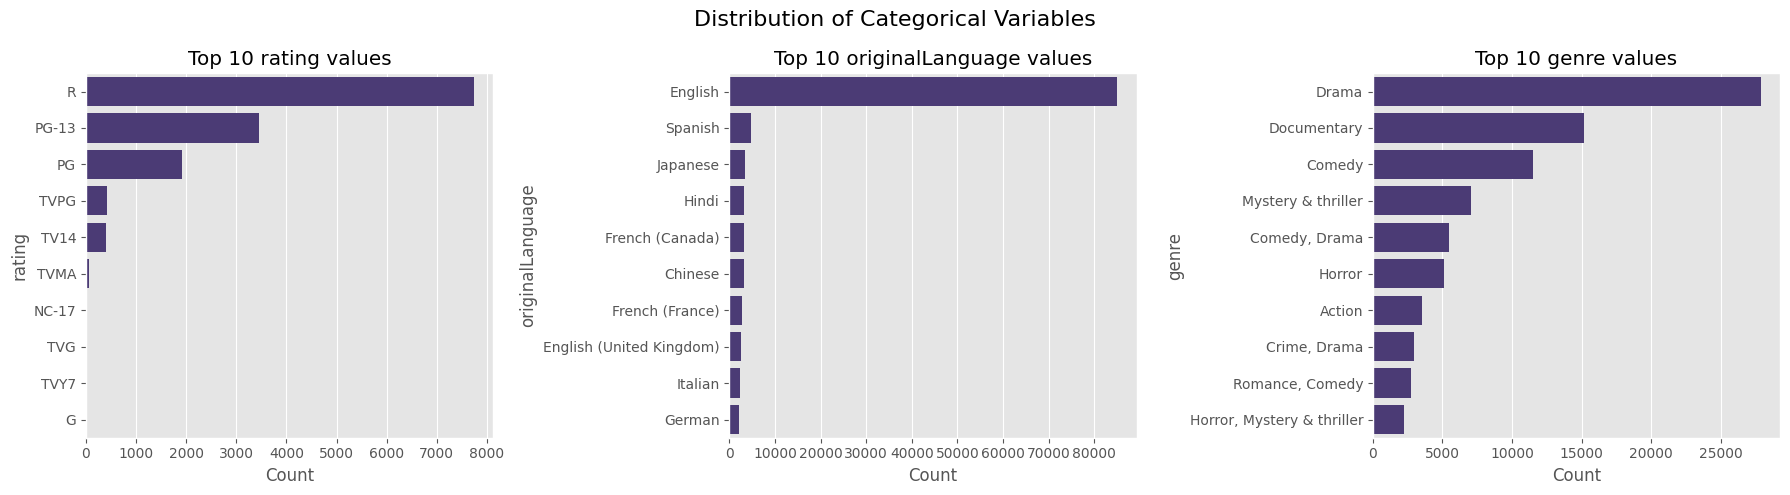

=== GENRE ANALYSIS ===


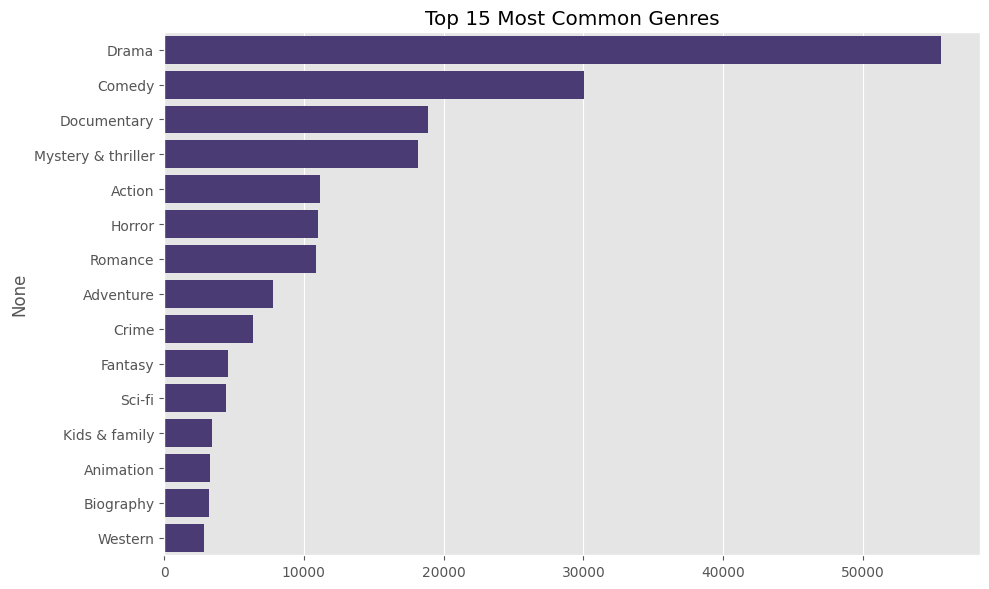

In [13]:
# Select categorical variables
categorical_vars = ['rating', 'originalLanguage', 'genre']

# Create frequency plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

for i, var in enumerate(categorical_vars):
    # Get top 10 categories
    top_categories = movies[var].value_counts().head(10)
    
    # Create bar plot
    sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[i])
    axes[i].set_title(f'Top 10 {var} values')
    axes[i].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Detailed genre analysis (since it's multi-value)
print("=== GENRE ANALYSIS ===")
# Split genres and count occurrences
all_genres = []
for genres in movies['genre'].dropna():
    all_genres.extend([g.strip() for g in genres.split(',')])
    
genre_counts = pd.Series(all_genres).value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 15 Most Common Genres')
plt.tight_layout()
plt.show()

## Step 4: Bivariate Analysis

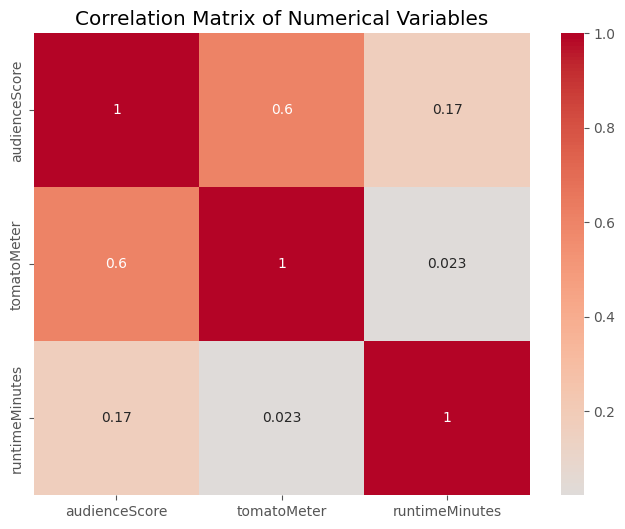

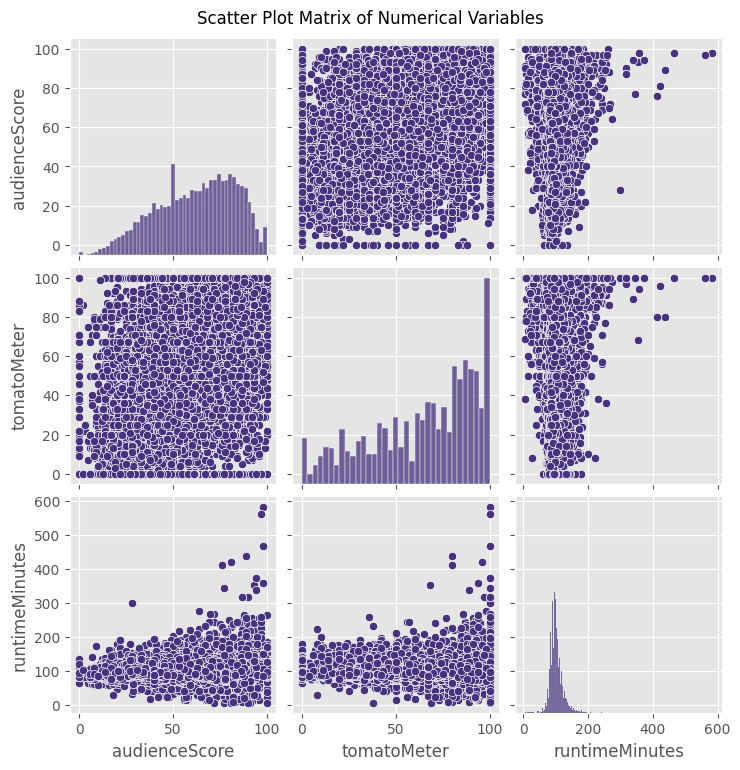

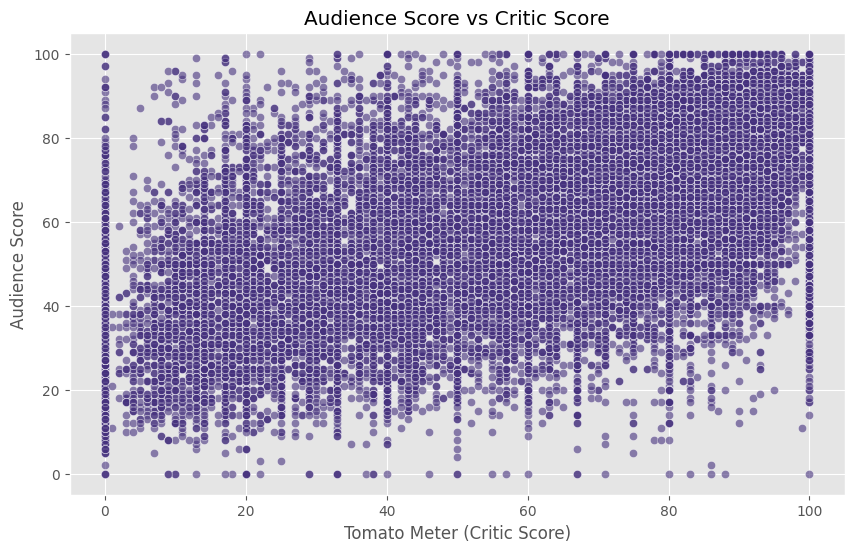

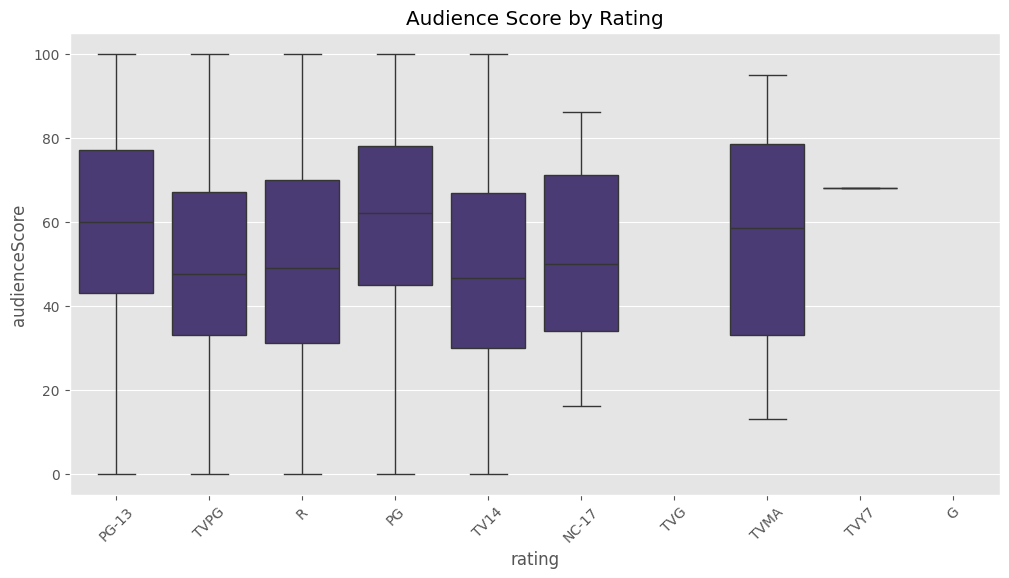

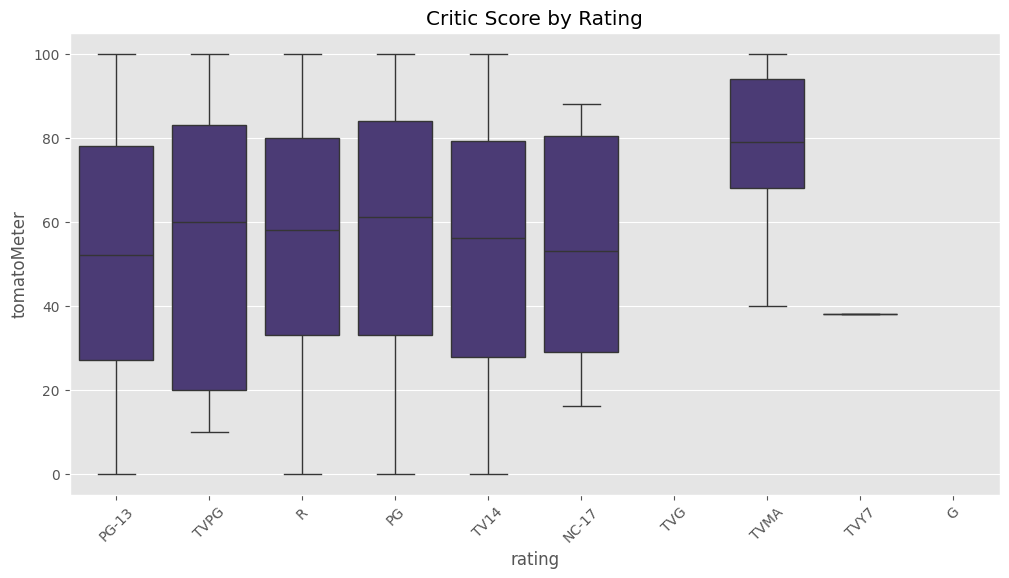

In [14]:
# Correlation matrix for numerical variables
numerical_df = movies[['audienceScore', 'tomatoMeter', 'runtimeMinutes']].dropna()

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Scatter plot matrix
sns.pairplot(numerical_df)
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

# Audience vs Critic score analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='tomatoMeter', y='audienceScore', alpha=0.6)
plt.title('Audience Score vs Critic Score')
plt.xlabel('Tomato Meter (Critic Score)')
plt.ylabel('Audience Score')
plt.show()

# Analyze scores by rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, x='rating', y='audienceScore')
plt.title('Audience Score by Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, x='rating', y='tomatoMeter')
plt.title('Critic Score by Rating')
plt.xticks(rotation=45)
plt.show()

## Step 5: Missing Value Treatment

In [18]:
# Check missing values
print("=== MISSING VALUES BEFORE TREATMENT ===")
missing_before = movies.isnull().sum()
print(missing_before[missing_before > 0])

# Handle missing values
movies_clean = movies.copy()

# Numerical columns - median imputation
numerical_cols = ['audienceScore', 'tomatoMeter', 'runtimeMinutes']
for col in numerical_cols:
    movies_clean[col] = movies_clean[col].fillna(movies_clean[col].median())

# Categorical columns - mode imputation or 'Unknown'
categorical_cols = ['rating', 'genre', 'originalLanguage', 'director']
for col in categorical_cols:
    movies_clean[col] = movies_clean[col].fillna('Unknown')

# # Date columns - forward fill or specific value
# date_cols = ['releaseDateTheatres', 'releaseDateStreaming']
# for col in date_cols:
#     movies_clean[col] = movies_clean[col].fillna('Not Available')

# Verify missing values after treatment
print("\n=== MISSING VALUES AFTER TREATMENT ===")
missing_after = movies_clean.isnull().sum()
print(missing_after[missing_after > 0])

=== MISSING VALUES BEFORE TREATMENT ===
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4217
writer                   53142
boxOffice               128515
distributor             120257
soundMix                127341
dtype: int64

=== MISSING VALUES AFTER TREATMENT ===
title                      367
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
writer                   53142
boxOffice               128515
distributor             120257
soundMix                127341
dtype: int64


## Step 6: Outlier Detection & Treatment


In [19]:
# Identify outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in numerical columns
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(movies_clean, col)
    print(f"{col}: {len(outliers)} outliers (bounds: {lower:.2f} to {upper:.2f})")

# Treat outliers in runtimeMinutes (capping method)
Q1 = movies_clean['runtimeMinutes'].quantile(0.25)
Q3 = movies_clean['runtimeMinutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

movies_clean['runtimeMinutes'] = np.where(
    movies_clean['runtimeMinutes'] > upper_bound, 
    upper_bound, 
    movies_clean['runtimeMinutes']
)

movies_clean['runtimeMinutes'] = np.where(
    movies_clean['runtimeMinutes'] < lower_bound, 
    lower_bound, 
    movies_clean['runtimeMinutes']
)

print("\nAfter outlier treatment:")
print(f"Runtime range: {movies_clean['runtimeMinutes'].min():.2f} to {movies_clean['runtimeMinutes'].max():.2f}")

audienceScore: 69443 outliers (bounds: 55.50 to 59.50)
tomatoMeter: 33509 outliers (bounds: 73.00 to 73.00)
runtimeMinutes: 19213 outliers (bounds: 61.00 to 125.00)

After outlier treatment:
Runtime range: 61.00 to 125.00


## Step 7: Variable Transformation


In [22]:
# Create new features
movies_clean['scoreDifference'] = abs(movies_clean['audienceScore'] - movies_clean['tomatoMeter'])
movies_clean['consensusScore'] = (movies_clean['audienceScore'] + movies_clean['tomatoMeter']) / 2

# # Extract year from release date
# movies_clean['releaseYear'] = pd.to_datetime(movies_clean['releaseDateTheatres'], errors='coerce').dt.year
# movies_clean['releaseYear'] = movies_clean['releaseYear'].fillna(movies_clean['releaseYear'].median())

# Create runtime categories
bins = [0, 60, 90, 120, 180, 1000]
labels = ['Short', 'Medium', 'Long', 'Very Long', 'Epic']
movies_clean['runtimeCategory'] = pd.cut(movies_clean['runtimeMinutes'], bins=bins, labels=labels)

# Create success indicator
movies_clean['criticSuccess'] = movies_clean['tomatoMeter'] >= 70
movies_clean['audienceSuccess'] = movies_clean['audienceScore'] >= 70
movies_clean['doubleSuccess'] = movies_clean['criticSuccess'] & movies_clean['audienceSuccess']

print("=== NEW FEATURES CREATED ===")
print(movies_clean[['scoreDifference', 'consensusScore', 'runtimeCategory']].head())

=== NEW FEATURES CREATED ===
   scoreDifference  consensusScore runtimeCategory
0             23.0            61.5          Medium
1             16.0            65.0            Long
2             30.0            58.0            Long
3             13.0            66.5          Medium
4              3.0            71.5          Medium


## Step 8: Final Data Quality Check


In [23]:
# Final data quality report
print("=== FINAL DATA QUALITY REPORT ===")
print(f"Dataset shape: {movies_clean.shape}")
print(f"Missing values: {movies_clean.isnull().sum().sum()}")
print(f"Duplicate records: {movies_clean.duplicated().sum()}")

# Data types overview
print("\n=== DATA TYPES ===")
print(movies_clean.dtypes.value_counts())

# Save cleaned dataset
movies_clean.to_csv('../data/cleaned_movies.csv', index=False)
print("\nCleaned dataset saved to '../data/cleaned_movies.csv'")

=== FINAL DATA QUALITY REPORT ===
Dataset shape: (143258, 22)
Missing values: 735212
Duplicate records: 1204

=== DATA TYPES ===
object      13
float64      5
bool         3
category     1
Name: count, dtype: int64

Cleaned dataset saved to '../data/cleaned_movies.csv'


## Step 9: Key Insights Summary


In [26]:
# Generate key insights
print("=== KEY INSIGHTS ===")

# 1. Score relationship
correlation = movies_clean['audienceScore'].corr(movies_clean['tomatoMeter'])
print(f"1. Audience-Critic correlation: {correlation:.3f}")

# 2. Rating impact
rating_impact = movies_clean.groupby('rating')['consensusScore'].mean().sort_values(ascending=False)
print(f"\n2. Highest rated content by rating:")
print(rating_impact.head(3))

# 3. Runtime impact
runtime_impact = movies_clean.groupby('runtimeCategory')['consensusScore'].mean().sort_values(ascending=False)
print(f"\n3. Highest rated runtime categories:")
print(runtime_impact.head(3))

# # 4. Success rates
# success_rate = movies_clean['doubleSuccess'].mean() * 100
# print(f"\n4. Films loved by both critics and audiences: {success_rate:.1f}%")

# # 5. Yearly trends
# yearly_trend = movies_clean.groupby('releaseYear')['consensusScore'].mean()
# print(f"\n5. Best year for films: {yearly_trend.idxmax()} (avg score: {yearly_trend.max():.1f})")

=== KEY INSIGHTS ===
1. Audience-Critic correlation: 0.260

2. Highest rated content by rating:
rating
TVMA    65.245614
G       65.000000
TVG     65.000000
Name: consensusScore, dtype: float64

3. Highest rated runtime categories:
runtimeCategory
Very Long    67.443468
Long         63.693596
Medium       63.189189
Name: consensusScore, dtype: float64


/var/folders/t5/pg0w66gn2xb66hxy0jtjsmyc0000gn/T/ipykernel_31416/1146109960.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_impact = movies_clean.groupby('runtimeCategory')['consensusScore'].mean().sort_values(ascending=False)


## Step 10: Create Visualization Summary

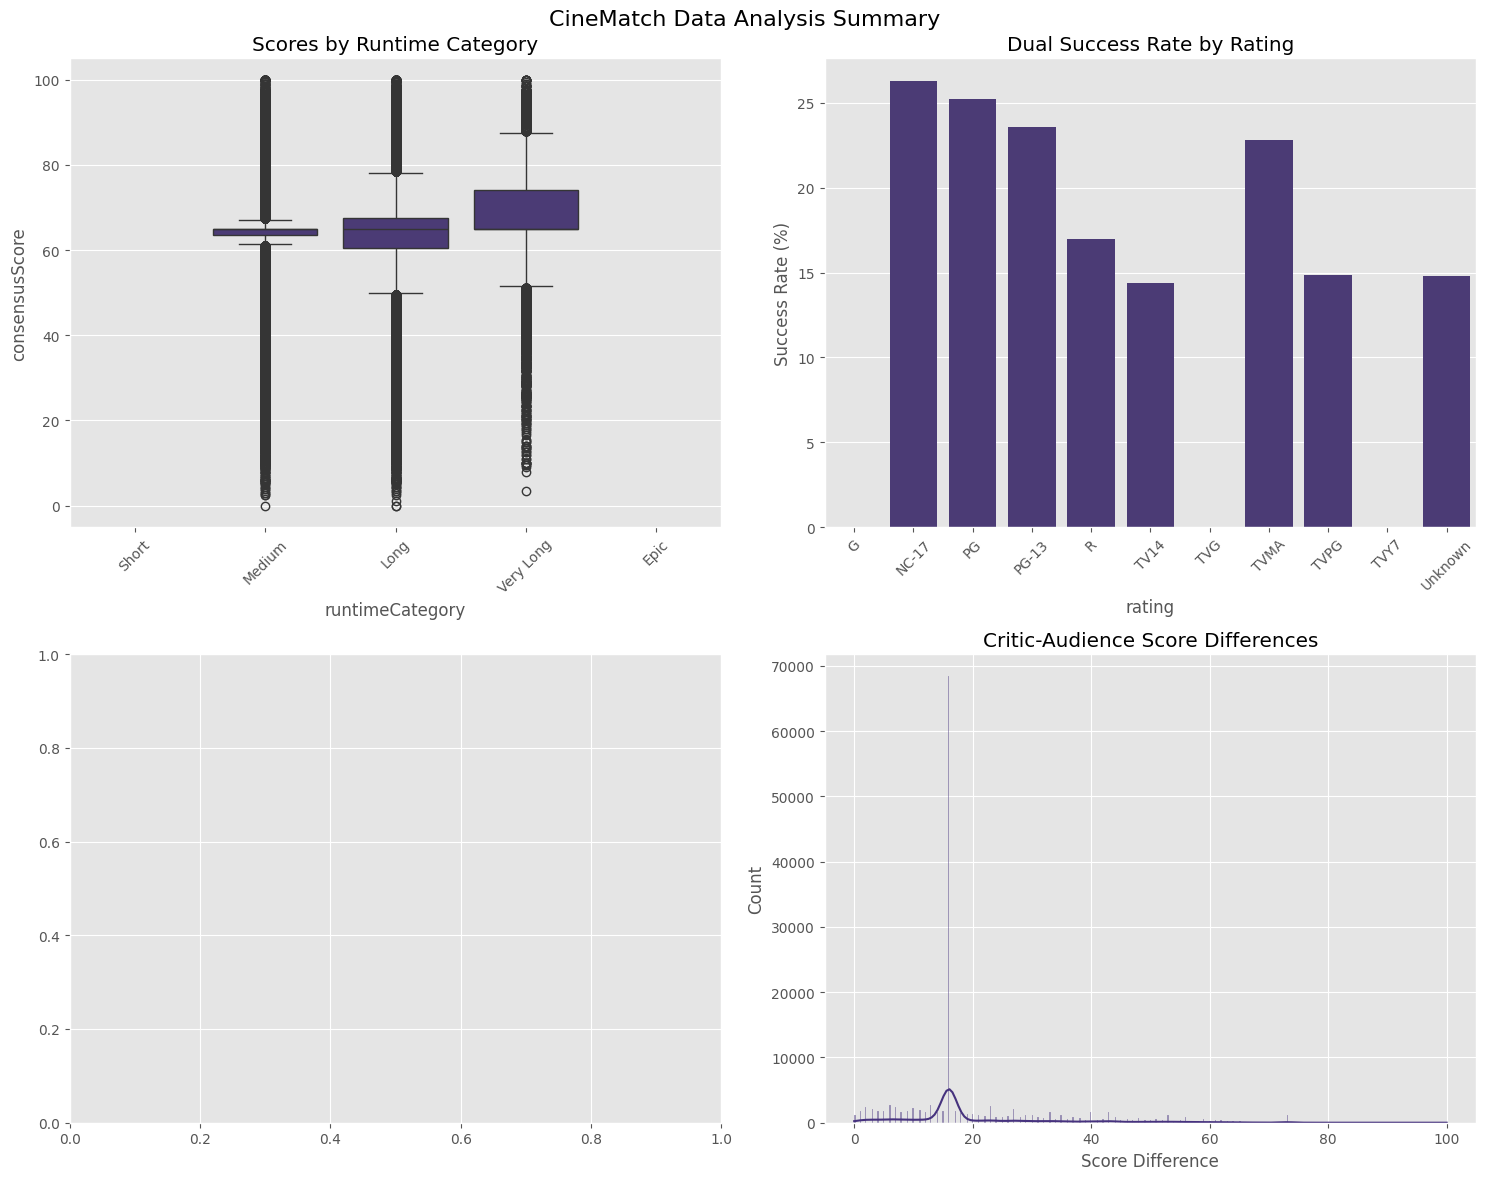

In [29]:
# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('CineMatch Data Analysis Summary', fontsize=16)

# 1. Score distribution by runtime category
sns.boxplot(data=movies_clean, x='runtimeCategory', y='consensusScore', ax=axes[0, 0])
axes[0, 0].set_title('Scores by Runtime Category')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Success rate by rating
success_by_rating = movies_clean.groupby('rating')['doubleSuccess'].mean() * 100
sns.barplot(x=success_by_rating.index, y=success_by_rating.values, ax=axes[0, 1])
axes[0, 1].set_title('Dual Success Rate by Rating')
axes[0, 1].set_ylabel('Success Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# # 3. Yearly trend of scores
# yearly_avg = movies_clean.groupby('releaseYear')['consensusScore'].mean()
# axes[1, 0].plot(yearly_avg.index, yearly_avg.values)
# axes[1, 0].set_title('Average Scores by Release Year')
# axes[1, 0].set_xlabel('Year')
# axes[1, 0].set_ylabel('Average Score')

# 4. Score difference distribution
sns.histplot(movies_clean['scoreDifference'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Critic-Audience Score Differences')
axes[1, 1].set_xlabel('Score Difference')

plt.tight_layout()
plt.savefig('../images/data_analysis_summary.png', dpi=300, bbox_inches='tight')
plt.show()